# 1. 로지스틱 회귀

1. 합격여부 데이터 읽기
2. 그래프 그리기
3. 학습
4. decision boundary

## 1) 합격여부 데이터 읽기

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/admit.txt', names=['ex1', 'ex2', 'Admitted'])
print(data)

X = np.c_[data['ex1'], data['ex2']]
y = data['Admitted']
m = len(data)

          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


In [2]:
print(X.shape, y.shape)

(100, 2) (100,)


## 2) 그래프 그리기

In [3]:
pos = []
neg = []

for i, val in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)
print(pos)
print(neg)

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


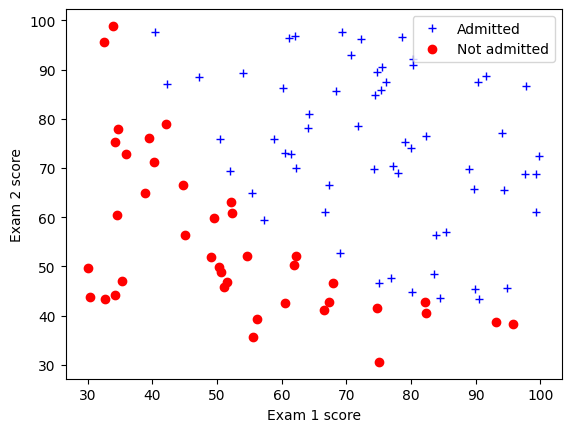

In [4]:
import matplotlib.pyplot as plt

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Admitted')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.show()

## 3) 학습

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', C=10)
log_reg.fit(X, y)

LogisticRegression(C=10, solver='liblinear')

In [6]:
log_reg.predict([[30, 70], [50, 90]])

array([0, 1])

## 4) decision boundary

([], [])

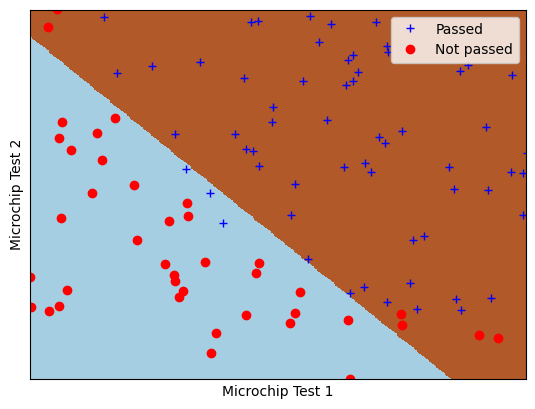

In [7]:
x_min, x_max = X[:,0].min(), X[:,0].max()
y_min, y_max = X[:,1].min(), X[:,1].max()
h = .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not passed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# 2. 로지스틱 회귀 + 정규화

1. 합격여부 데이터 읽기
2. 그래프 그리기
3. 학습
4. decision boundary

## 1) 불량여부 데이터 읽기

In [8]:
import numpy as np
import pandas as pd
data = pd.read_csv('../data/qa.txt', names=['t1', 't2', 'Passed'])
print(data)

X = np.c_[data['t1'], data['t2']]
y = data['Passed']
m = len(data)

           t1        t2  Passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]


## 2) 그래프 그리기

In [9]:
pos = []
neg = []

for i, val in enumerate(y):
    if val == 1:
        pos.append(i)
    else:
        neg.append(i)

print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


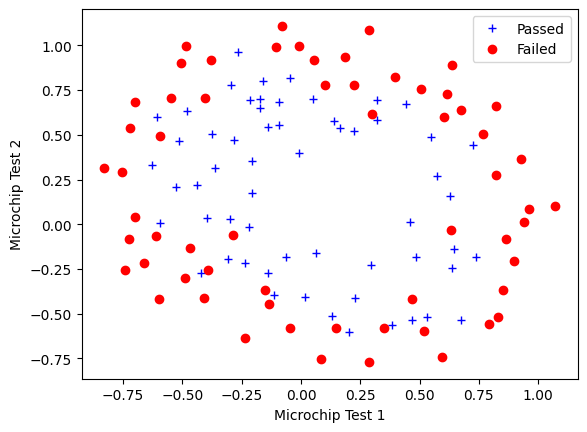

In [10]:
import matplotlib.pyplot as plt

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Failed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.show()

## 3) 학습

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 6
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0].shape)

[0.051267 0.69956 ]
(5,)


In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=1e-1) # 1, 1e4(규제 조금), 1e-1(규제 많이)
log_reg.fit(X_poly, y)

LogisticRegression(C=0.1, solver='liblinear')

## 4) decision boundary

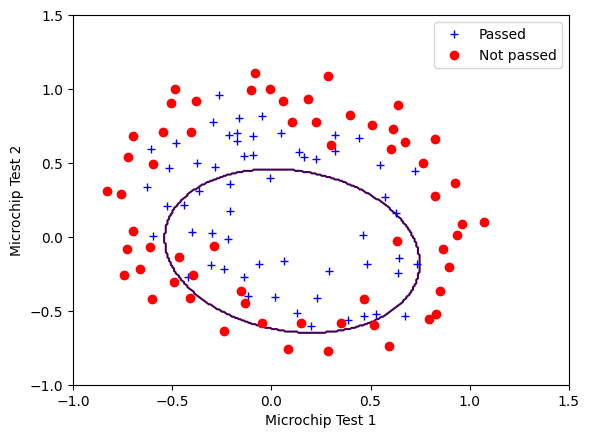

In [13]:
u = np.linspace(-1, 1.5, 300)
v = np.linspace(-1, 1.5, 300)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    a = []
    for j in range(len(v)):
        a.append(np.array([u[i], v[j]]))
    my_data = poly_features.fit_transform(a)
    z[i] = log_reg.predict(my_data)

plt.contour(u,v,z,0)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not passed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.show()

## 5) 로지스틱 회귀의 성능 측정법

[0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0]
[[55  5]
 [25 33]]


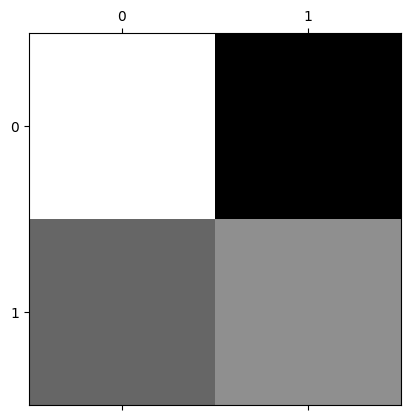

precision_score:  0.868421052631579
recall_score:  0.5689655172413793
F1_score:  0.6875000000000001


In [14]:
y_pred = log_reg.predict(X_poly)
print(y_pred)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y, y_pred))
print("recall_score: ", recall_score(y, y_pred))

from sklearn.metrics import f1_score
print("F1_score: ", f1_score(y, y_pred))

In [15]:
y_scores = log_reg.decision_function(X_poly)
print(y_scores)

[-0.00517655  0.02114767  0.02034891  0.05983077  0.02930306  0.05272572
  0.08981836  0.07808667  0.04876573 -0.00171217 -0.08556557 -0.13153139
 -0.12404946 -0.18427165 -0.13487109 -0.04670332  0.02659333 -0.04240179
  0.01824929 -0.00283934 -0.0367887   0.00146918  0.01157888  0.02324305
  0.04867249 -0.05011405 -0.10682483 -0.2187675   0.07152535 -0.02171181
 -0.11162067 -0.02640976  0.03777551  0.08242427  0.09543552  0.11324859
  0.08690546  0.10857233  0.10572989  0.01649149  0.04428477 -0.02707067
 -0.11607472 -0.003152   -0.11143649 -0.09467451 -0.24934733  0.01284108
 -0.14471094 -0.09243378  0.02234097  0.10017973  0.06769424  0.11278952
  0.13029633  0.08245033  0.12269246  0.08484452 -0.16341557 -0.09337134
 -0.05089044 -0.22586004 -0.28600092 -0.21583266 -0.3034788  -0.4038523
 -0.2842659  -0.37968839 -0.3509321  -0.280453   -0.3172939  -0.30227118
 -0.32424925 -0.30997975 -0.25791986 -0.15364118 -0.06798362 -0.07953108
 -0.15350355 -0.11387173 -0.03172968  0.02832465 -0.

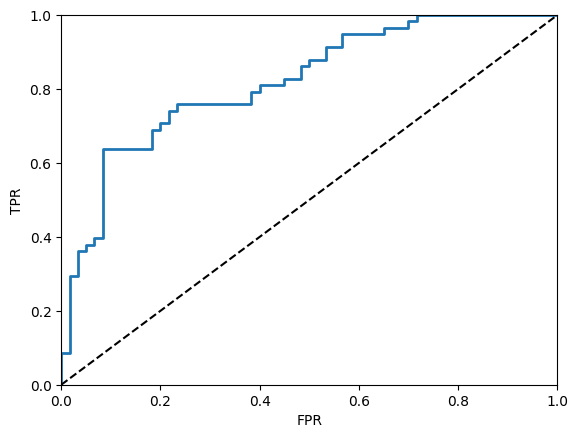

roc_auc_score:  0.8209770114942528


In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, threshoolds = roc_curve(y, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
plot_roc_curve(fpr, tpr)
plt.show()

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ", roc_auc_score(y, y_scores))